# Analysing the Minesweeper Algorithm

## Objective

The objective of this notebook is to analyse the performance of the minesweeper solver and how it plays the game.

## Loading data and libraries

The data was generated in "test_solver.py" and saved in the "minesweeper_data.csv" file.
<br><br>
Each row is a game in hard difficulty (you can change the difficulty in "test_solver.py").
<br><br>
Columns of the dataset:
- id: id of game
- won: True if win; False otherwise
- time: how much time (in seconds) to end game
- strategies: vector of plays made (s -> simple strategy; c -> complex strategy, r -> random guess). For example, "sscrr" means the algorithm did 5 clicks, the first two using the simple strategy, next using the complex strategy, and then two random guesses.

In [32]:
# important libraries
import pandas as pd
import numpy as numpy
import seaborn as sns

In [2]:
df = pd.read_csv("minesweeper_data.csv")
df

,id,won,time,strategies
0,1,False,0.130462,ssssssssssssssssssssssssssssssssssssssssssssss...
1,2,False,0.039096,ssssssssssssssssssssssssssssssssssssssssssssss...
2,3,False,0.039250,ssssssssssssssssssssssssssssssssssssssssssssss...
3,4,True,0.067512,ssssssccccccccssssssssssssssssssssssssssssssss...
4,5,False,0.043340,sssssssssssssssssssssssssssssssssssssssccccccc...
...,...,...,...,...
9995,9996,True,0.048499,sssssssssssssssssssssssscccsssssssssssssssssss...
9996,9997,False,0.055806,ssssssssssssssssssssssssssssssssssssssssssssss...
9997,9998,True,0.063424,ssssssssssssssssssssssssssssssssssssssssssssss...
9998,9999,False,0.027212,ssssssssssssssssssssssssssssssssssssssssssssss...


In [10]:
# The algorithm should only lose when making a random guess. Let's verify if that's the case (last play of lost games should always be "r")
df["strategies"][df["won"] == False].apply(lambda s: s[-1]).value_counts()

strategies
r    6965
Name: count, dtype: int64

In [25]:
# simple function that will be used alot
# returns the % with two decimal places (ex: porcentage(1, 2) = 50.00)
def porcentage(a, b):
    return round(100 * a / b, 2)

## Winning Games and Strategies

Here, we want to understand how good the algorithm is at winning games, as well as which strategies are more valuable.

In [13]:
# Basic win rate
print(f"Win Rate: {round(100 * df['won'].mean(), 2)}%")

Win Rate: 30.35%


In [20]:
# How many games are won without guessing?
df["hasGuessed"] = df["strategies"].apply(lambda s: "r" in s)
wins_guessed = df["won"][df["hasGuessed"]].sum()
won_games = df["won"].sum()
print(f"Win Rate without guessing: {round(100 * (won_games - wins_guessed) / len(df), 2)}%")

Win Rate without guessing: 9.16%


In [21]:
# How many games are won without guessing nor using complex strategy?
df["onlySimple"] = df["strategies"].apply(lambda s: "r" not in s and "c" not in s)
wins_simple = df["won"][df["onlySimple"]].sum()
print(f"Win Rate with only simple strategy: {round(100 * (wins_simple) / len(df), 2)}%")

Win Rate with only simple strategy: 0.08%


In [26]:
# How often is each strategy used?
count_simple = df["strategies"].apply(lambda s: s.count("s")).sum()
count_complex = df["strategies"].apply(lambda s: s.count("c")).sum()
count_random = df["strategies"].apply(lambda s: s.count("r")).sum()
count_total = count_simple + count_complex + count_random
print("Frequency of each strategy:")
print(f"Simple: {porcentage(count_simple, count_total)}%")
print(f"Complex: {porcentage(count_complex, count_total)}%")
print(f"Random: {porcentage(count_random, count_total)}%")

Frequency of each strategy:
Simple: 89.33%
Complex: 9.61%
Random: 1.06%


In [27]:
# How often is each strategy used in won games?
count_simple = df["strategies"][df["won"]].apply(lambda s: s.count("s")).sum()
count_complex = df["strategies"][df["won"]].apply(lambda s: s.count("c")).sum()
count_random = df["strategies"][df["won"]].apply(lambda s: s.count("r")).sum()
count_total = count_simple + count_complex + count_random
print("Frequency of each strategy:")
print(f"Simple: {porcentage(count_simple, count_total)}%")
print(f"Complex: {porcentage(count_complex, count_total)}%")
print(f"Random: {porcentage(count_random, count_total)}%")

Frequency of each strategy:
Simple: 90.24%
Complex: 9.14%
Random: 0.62%


What we can conclude:
- The game has a win rate of about 30.35% (considering a confidence interval of 95%, it's between 27.25% and 33.45%);
- Allowing guesses, even though is what makes it lose games, is necessary to game a good win rate;
- Without the usage of more complex strategies, the algorithm can't win even 0.1% of games;
- Even though complex strategies and random guesses are necessary, most of the plays are using simple strategies. This means that most of the won games uses these complex and random strategies in only a few plays.

## Time Performance and Number of Plays

Here, we want to analyise the algorithm by time performace. Another way to understand the speed of the algorithm is by looking at how many plays/clicks it does. 

In [29]:
# Average Time Performance in all games, in wins and losses
time_all = df["time"].mean()
time_wins = df["time"][df["won"]].mean()
time_losses = df["time"][df["won"] == False].mean()

print(f"Average Time (Total): {round(time_all, 5)} seconds")
print(f"Average Time (Wins): {round(time_wins, 5)} seconds")
print(f"Average Time (Losses): {round(time_losses, 5)} seconds")

Average Time (Total): 0.05756 seconds
Average Time (Wins): 0.06189 seconds
Average Time (Losses): 0.05567 seconds


In [30]:
# How many games per second?
games_per_second = round(1 / time_all)
print(f"Number of Games per second: {games_per_second}")

Number of Games per second: 17


In [31]:
# How much faster than world record? (Ze-En Ju, in 2020, did in 29.43 seconds)
world_record = 29.43
faster = round(world_record / time_wins, 1)
print(f"Algorithm vs. Human: {faster}x times faster")

Algorithm vs. Human: 475.6x times faster


In [39]:
# Slowest and Fastest games (only considering fastest win, since losses can be almost instantaneous)
print(f"Slowest time: {df['time'].max()} seconds")
print(f"Fastest time: {df['time'][df['won']].min()} seconds")

Slowest time: 5.807340383529663 seconds
Fastest time: 0.0166773796081542 seconds


In [42]:
# How many games took more than one second?
slow_games = len(df[df["time"] > 1])
print(f"Number of Games that took over a second: {slow_games} ({porcentage(slow_games, len(df))}%)")

Number of Games that took over a second: 14 (0.14%)


In [50]:
# Distribution of time spent (by intervals of 0.1 seconds)
interval = 0.1
top = interval
while len(df[df["time"] < top]) < len(df):
    n_games = len(df[df["time"] < top])
    print(f" < {round(top, 1)} seconds: {porcentage(n_games, len(df))}%")
    top += interval
print(f" < {round(top, 1)} seconds: {porcentage(n_games, len(df))}%")

 < 0.1 seconds: 92.13%
 < 0.2 seconds: 97.69%
 < 0.3 seconds: 98.91%
 < 0.4 seconds: 99.29%
 < 0.5 seconds: 99.55%
 < 0.6 seconds: 99.71%
 < 0.7 seconds: 99.75%
 < 0.8 seconds: 99.76%
 < 0.9 seconds: 99.81%
 < 1.0 seconds: 99.86%
 < 1.1 seconds: 99.9%
 < 1.2 seconds: 99.9%
 < 1.3 seconds: 99.96%
 < 1.4 seconds: 99.97%
 < 1.5 seconds: 99.98%
 < 1.6 seconds: 99.98%
 < 1.7 seconds: 99.98%
 < 1.8 seconds: 99.98%
 < 1.9 seconds: 99.98%
 < 2.0 seconds: 99.98%
 < 2.1 seconds: 99.98%
 < 2.2 seconds: 99.98%
 < 2.3 seconds: 99.98%
 < 2.4 seconds: 99.98%
 < 2.5 seconds: 99.98%
 < 2.6 seconds: 99.98%
 < 2.7 seconds: 99.98%
 < 2.8 seconds: 99.98%
 < 2.9 seconds: 99.99%
 < 3.0 seconds: 99.99%
 < 3.1 seconds: 99.99%
 < 3.2 seconds: 99.99%
 < 3.3 seconds: 99.99%
 < 3.4 seconds: 99.99%
 < 3.5 seconds: 99.99%
 < 3.6 seconds: 99.99%
 < 3.7 seconds: 99.99%
 < 3.8 seconds: 99.99%
 < 3.9 seconds: 99.99%
 < 4.0 seconds: 99.99%
 < 4.1 seconds: 99.99%
 < 4.2 seconds: 99.99%
 < 4.3 seconds: 99.99%
 < 4.4 second

<Axes: xlabel='time', ylabel='Count'>

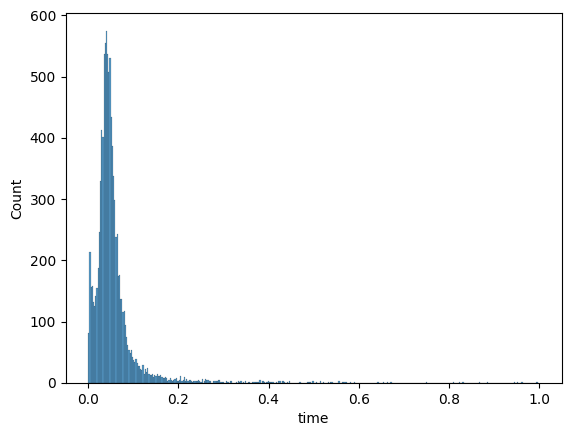

In [43]:
# Plotting Distribution of time spent (only considering games that took less than a second)
sns.histplot(df["time"], binrange=(0, 1))

In [62]:
# Average time per game (without outliers). Considering outliers games the top 0.5% slowest games and top 0.5% fastest games
top = round(0.5 / 100 * len(df)) # getting 0.5% of total games
top_slowest = df["time"].nlargest(top).min()
top_fastest = df["time"].nsmallest(top).max()
not_outliers = df[(df["time"] > top_fastest) & (df["time"] < top_slowest)]  # anithing between the outliers vaues
print(f"Average Time with Outliers: {round(df['time'].mean(), 5)} seconds")
print(f"Average Time without Outliers: {round(not_outliers['time'].mean(), 5)} seconds")

Average Time with Outliers: 0.05756 seconds
Average Time without Outliers: 0.05339 seconds


In [63]:
# Average time per game, without top 0.5% slowest only
top = round(0.5 / 100 * len(df)) # getting 0.5% of total games
top_slowest = df["time"].nlargest(top).min()
not_outliers = df[df["time"] < top_slowest]  # anithing between the outliers vaues
print(f"Average Time without slowest games: {round(not_outliers['time'].mean(), 5)} seconds")

Average Time without slowest games: 0.05313 seconds


In [65]:
# Average number of plays
n_plays = df["strategies"].apply(len).mean()
print(f"Average Number of Plays: {round(n_plays, 2)}")

Average Number of Plays: 233.79


In [71]:
# Average number of plays in wins
n_plays_wins = df["strategies"][df["won"]].apply(len).mean()
print(f"Average Number of Plays in wins: {round(n_plays_wins, 2)}")

Average Number of Plays in wins: 304.18


In [72]:
# Average number of plays in losses
n_plays_losses = df["strategies"][df["won"] == False].apply(len).mean()
print(f"Average Number of Plays in wins: {round(n_plays_losses, 2)}")

Average Number of Plays in wins: 203.11


In [73]:
# Ratio between these two
print(f"Plays per Win / Plays per Loss: {porcentage(n_plays_losses, n_plays_wins)}")

Plays per Win / Plays per Loss: 66.77


In [67]:
# Average time per play (turn into miliseconds since it's very small)
avg_time = df["time"].mean() * 1000
print(f"Average Time per play: {round(avg_time / n_plays, 5)} miliseconds")

Average Time per play: 0.24619 miliseconds


In [68]:
# Number of plays per second
avg_time = df["time"].mean()
plays_per_second = round(n_plays / avg_time)
print(f"Plays per second: {plays_per_second}")

Plays per second: 4062


What we can conclude:
- The average time per wins and losses is about the same;
- The algorithm is various orders of magnitude faster than a human;
- Even though some games took a few seconds, 99% of them take less than 0.4 seconds;
- The outliers don't impact the average time;
- It takes about 300 clicks to win a game;
- Since the number of clicks on losses is only about 67% of number of clicks in wins, but average time in both cenarios is about the same, it seems to indicate that the algorithm is faster in the last plays (which makes sense, considering the complexity of the plays increases with the number of unknown tiles);
- When looking at the algorithm playing in the interface, it seems to do a lot less than 4000 plays per second. This shows how much slower the UI is compared to the algorithm.

## Conclusion

The algorithm has a really good win rate. Comparing to others solvers, it has about the same accuracy (most good solvers in the internet have a little ober 30% win rate just like this one). The speed of the algorithm is also really good, to the point that, for the graphic interface, the time spent to calculate plays is irrelevant. There's no reason trying to make the algorithm go even faster without optimizing the interface first.
<br><br>
Comparing the algorithm to a human, a quick online search shows that a good player can win about 33% of games (maybe 40% for a perfect player). This would make this solver about as good as an average good minesweeper player (with the fact that it is 400x faster than the fastest person).